In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Position_CSV/K_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Roberto Aguayo,0,16,0.000000,Career,NaN,0.0,NaN,198.0,69.0,...,0.0,NaN,196.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Michael Badgley,5,18,4.444444,Career,NaN,1.0,NaN,172.0,77.0,...,0.0,NaN,178.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,Dan Bailey,33,138,3.826087,Career,NaN,0.0,NaN,199.0,57.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,Chris Boswell,16,74,3.459459,Career,NaN,0.0,NaN,164.0,65.0,...,0.0,NaN,200.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,John Brown,36,87,6.620690,NaN,NaN,NaN,NaN,15.0,6.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Career


In [3]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['field_goals_made', 'points', 'extra_points_made']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.05830962752040714
Weights:  [ 0.14328278 -0.05488645  0.06091969]


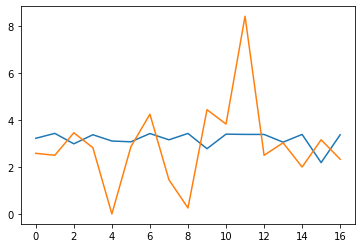

In [6]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  -0.05893044674922887
Weights:  [ 0.1209403  -0.04750248  0.0535703 ]


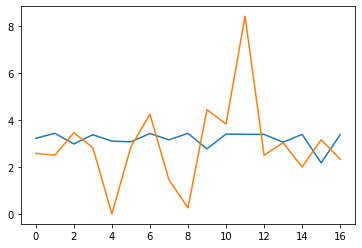

In [7]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [8]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-0.3785460642578319
[ 0.28272151 -0.09740944  0.0999062 ]

Ridge Regression
-0.37163151039423037
[ 0.17560257 -0.06232849  0.06559391]
